### Функции, порождающие данные

бесконечные итераторы

- count
- cycle
- repeat

Функция count() возвращает итератор, генерирующий бесконечную последовательность чисел.

In [1]:
# count имеет аргументы start and step - работает как традиционный бесконечный итератор

from itertools import count

count1 = count()

print(next(count1))
print(next(count1), next(count1), next(count1))

count2 = count(69, 10)

print(next(count2))
print(next(count2))
print(next(count2), next(count2), next(count2))

for i in zip(count(10), ['a', 'b', 'c']):
    print(i)

0
1 2 3
69
79
89 99 109
(10, 'a')
(11, 'b')
(12, 'c')


In [2]:
# Аргументами start и step функции count() могут быть любые числовые значения, допускающие операцию сложения

from itertools import count
from fractions import Fraction

for index, number in enumerate(count(1.0, 0.5)):
    if index < 6:
        print(number)
    else:
        break

frac_iter = count(1, Fraction(1, 2))
print(next(frac_iter), next(frac_iter), next(frac_iter), next(frac_iter), next(frac_iter))

1.0
1.5
2.0
2.5
3.0
3.5
1 3/2 2 5/2 3


Функция cycle() возвращает итератор, циклично генерирующий последовательность элементов переданного итерируемого объекта.

In [3]:
# функция cycle() сохраняет копию каждого элемента из iterable. 
# Когда итерируемый объект iterable исчерпан, функция начинает возвращать элементы из сохраненной копии

from itertools import cycle

for index, char in enumerate(cycle('abcd')):
    if index < 7:
        print(char)
    else:
        break

cycle_iter = cycle([0, 1])
print(next(cycle_iter), next(cycle_iter), next(cycle_iter), next(cycle_iter), next(cycle_iter))

# с zip интереснее всего - список из букв кончается раньше, чем последовательность 0123456, 
# но это не останавливает cycle - он начинает черпать копии буквенной последовательности abc, пока не исчерпает цифры
for i in zip(range(7), cycle(['a', 'b', 'c'])): 
    print(i)


# Поэтому Для выполнения функции cycle() может потребоваться значительное количество 
# дополнительной памяти в зависимости от длины iterable.

a
b
c
d
a
b
c
0 1 0 1 0
(0, 'a')
(1, 'b')
(2, 'c')
(3, 'a')
(4, 'b')
(5, 'c')
(6, 'a')


Функция repeat() возвращает итератор, бесконечно генерирующий единственное значение, переданное в качестве аргумента. Количество генераций можно ограничить c помощью необязательного аргумента times.

        Функция repeat() является ленивой, она использует только память, необходимую для хранения одного элемента.

In [4]:
# аргументы: obj (итерируемый ) и times (число повторений)

from itertools import repeat

for i in repeat('bee-and-geek', 5):
    print(i)

repeat_iter = repeat([1, 2, 3])

print(next(repeat_iter))
print(next(repeat_iter))
print(next(repeat_iter))

bee-and-geek
bee-and-geek
bee-and-geek
bee-and-geek
bee-and-geek
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


In [5]:
# сочетание repeat and zip

from itertools import count, repeat

for i, s in zip(count(), repeat('bee-and-geek', 5)):
    print(i, s)

0 bee-and-geek
1 bee-and-geek
2 bee-and-geek
3 bee-and-geek
4 bee-and-geek


In [6]:
# сочетание repeat and map

from itertools import repeat

for a, b, c in map(lambda x, у: (x, у, x * у), repeat(2), range(6)):
    print(f'{a} * {b} = {c}')

# функция lambda принимает два аргумента:
#  - бесконечно повторяющееся число 2 из функции repeat 
# - число из последовательности от 0 до 5 
# и перемножает их - заменяя таким образом элементы кортежа вида ((2,0), (2,1) ... (2,5)) 
# и переводя их в ленивый итератор map, который создаст значения ТОЛЬКО в случае явной итерации

2 * 0 = 0
2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10


In [7]:
list(map(lambda x, у: (x, у, x * у), repeat(2), range(6))) # что хранится в ленивом итераторе

[(2, 0, 0), (2, 1, 2), (2, 2, 4), (2, 3, 6), (2, 4, 8), (2, 5, 10)]

Функция starmap() возвращает итератор, элементами которого являются элементы переданного итерируемого объекта iterable, к которым была применена функция func

        Функция starmap() используется вместо map() в том случае, когда элементами итерируемого объекта являются другие итерируемые объекты, скажем, кортежи, и каждый элемент этих кортежей должен быть передан в функцию function в качестве самостоятельного аргумента.

In [8]:
# аргументы func and iterable

from itertools import starmap

persons = [('Timur', 'Guev'), ('Arthur', 'Kharisov')]
pairs = [(1, 3), (2, 5), (6, 4)]
points = [(1, 1, 1), (1, 1, 2), (2, 2, 3)]

full_names = list(starmap(lambda name, surname: f'{name} {surname}', persons))

print(full_names)
print(*starmap(lambda a, b: a + b, pairs))
print(*starmap(lambda x, y, z: x * y * z, points))


['Timur Guev', 'Arthur Kharisov']
4 7 10
1 2 12


In [9]:
persons = [('Timur', 'Guev'), ('Arthur', 'Kharisov')]
list(map(lambda x: f'{x[0]} {x[1]}', persons))

['Timur Guev', 'Arthur Kharisov']

In [13]:
persons = [('Timur', 'Guev'), ('Arthur', 'Kharisov')]
list(map(lambda a,b: f'{a} {b}', *persons))

['Timur Arthur', 'Guev Kharisov']

Функция accumulate() возвращает итератор, элементами которого являются накопленные суммы или накопленные результаты функции func.

        Функция работает аналогично функции reduce() за тем исключением, что функция accumulate() генерирует все промежуточные результаты, а не только конечный.

In [14]:
# аргументы: 
# func -  по умолчанию функция сложения operator.add, 
# - iterable,  
# - initial (начальное значение, по умолчанию None)

from itertools import accumulate
import operator

data = [3, 4, 6, 2, 1, 9, 0, 7, 5, 8]

print(list(accumulate(data)))
print(list(accumulate(data, operator.mul)))
print(list(accumulate(data, max)))
print(list(accumulate(data, min)))

[3, 7, 13, 15, 16, 25, 25, 32, 37, 45]
[3, 12, 72, 144, 144, 1296, 0, 0, 0, 0]
[3, 4, 6, 6, 6, 9, 9, 9, 9, 9]
[3, 3, 3, 2, 1, 1, 0, 0, 0, 0]


Обычно количество элементов результирующего итератора совпадает с количеством элементов итерируемого объекта. Однако, если задано значение аргумента initial, то накопление начинается с начального значения initial, и в этом случае результирующий итератор будет иметь один дополнительный элемент.

In [15]:
from itertools import accumulate

print(list(accumulate([1, 2, 3, 4, 5], initial=100)))

[100, 101, 103, 106, 110, 115]


In [16]:
#  бесконечная волна
import itertools as it
import time

symbols = ['.', '-', "'", '"', "'", '-', '.', '_']

for c in it.cycle(symbols):
    print(c, end='')
    time.sleep(0.05)

.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-._.-'"'-

KeyboardInterrupt: 

In [17]:
# анимированная волна

import time

symbols = ['.', '-', "'", '"', "'", '-', '.', '_']

while True:
    symbols = '\r' + symbols.pop() + ''.join(symbols)
    print(symbols, end='')
    symbols = list(symbols)[1:]
    time.sleep(0.1)

_.-'"'-.

KeyboardInterrupt: 

### Задачи на cycle, repeat, count, accumulate, starmap

        Функция tabulate()
        Реализуйте функцию tabulate(), которая принимает один аргумент:

        func — произвольная функция
        Функция tabulate() должна возвращать итератор, генерирующий бесконечную последовательность возвращаемых значений функции func сначала с аргументом 1, затем 2, затем 3, и так далее.

In [22]:
def tabulate(func):
    import itertools as it
    for elem in it.count(1):
        yield func(elem)

func = lambda x: x
values = tabulate(func)

print(next(values))
print(next(values))

print()

func = lambda x: x + 10
values = tabulate(func)

print(next(values))
print(next(values))
print(next(values))

print()

func = lambda x: x ** 2
values = tabulate(func)

for _ in range(100):
    print(next(values))

1
2

11
12
13

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801
10000


        Реализуйте функцию factorials() с использованием функции accumulate(), которая принимает один аргумент:

        n — натуральное число
        Функция должна возвращать итератор, генерирующий последовательность из n чисел, каждое из которых является факториалом очередного натурального числа.

In [24]:
def factorials(n):
    from itertools import accumulate, count
    return accumulate(func= lambda x,y: x*y, iterable= range(1, n+1))

numbers = factorials(6)

print(*numbers)

1 2 6 24 120 720


        Функция alnum_sequence()
        Реализуйте функцию alnum_sequence(), которая не принимает никаких аргументов.

        Функция должна возвращать итератор, циклично генерирующий бесконечную последовательность натуральных чисел и заглавных латинских букв:

        1,A,2,B,3,C,..,X,25,Y,26,Z

In [65]:
def alnum_sequence():
    import itertools as it
    return it.cycle((elem for tup in  zip(range(1,27), 
                               map(chr, range(ord('A'), ord('Z')+1))) 
                               for elem in tup))

alnum = alnum_sequence()

print(*(next(alnum) for _ in range(55)))

print()

alnum = alnum_sequence()

for _ in range(100_000):
    next(alnum)

print(next(alnum))
print(next(alnum))
print(next(alnum))
print(next(alnum))

1 A 2 B 3 C 4 D 5 E 6 F 7 G 8 H 9 I 10 J 11 K 12 L 13 M 14 N 15 O 16 P 17 Q 18 R 19 S 20 T 21 U 22 V 23 W 24 X 25 Y 26 Z 1 A 2

3
C
4
D


In [63]:
# неверное решение, потому что ZIP объединяет в пары типа (цифра, буква), 
# а нужен генератор, который поочередно запускает цифру и букву - бесконечно

def alnum_sequence1():
    import itertools as it
    while True:
        for i, s in zip(range(1,27), 
                        map(chr, range(ord('A'), ord('Z')+1))):
            yield f'{i} {s}'

alnum1 = alnum_sequence1()

print(*(next(alnum1) for _ in range(55)))

print()

alnum1 = alnum_sequence1()

for _ in range(100_000):
    next(alnum1)

print(next(alnum1))
print(next(alnum1))
print(next(alnum1))
print(next(alnum1))

1 A 2 B 3 C 4 D 5 E 6 F 7 G 8 H 9 I 10 J 11 K 12 L 13 M 14 N 15 O 16 P 17 Q 18 R 19 S 20 T 21 U 22 V 23 W 24 X 25 Y 26 Z 1 A 2 B 3 C 4 D 5 E 6 F 7 G 8 H 9 I 10 J 11 K 12 L 13 M 14 N 15 O 16 P 17 Q 18 R 19 S 20 T 21 U 22 V 23 W 24 X 25 Y 26 Z 1 A 2 B 3 C

5 E
6 F
7 G
8 H


In [64]:
# генератор распакованных кортежей вида (цифра, буква)
gen =(elem for tup in  zip(range(1,27), 
                               map(chr, range(ord('A'), ord('Z')+1))) 
                               for elem in tup)

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

1
A
2
B
3


        Функция roundrobin() 🌶️
        Реализуйте функцию roundrobin(), которая принимает произвольное количество позиционных аргументов, каждый из которых является итерируемым объектом.

        Функция должна возвращать итератор, генерирующий последовательность из элементов всех переданных итерируемых объектов: сначала первый элемент первого итерируемого объекта, затем первый элемент второго итерируемого объекта, и так далее; после второй элемент первого итерируемого объекта, затем второй элемент второго итерируемого объекта, и так далее.

In [96]:
def roundrobin(*args):
    from itertools import zip_longest
    args_without_nones = (map(lambda x: (x, '~')[x is None], arg) for arg in args)
    temp = filter(lambda x: x is not None, 
                  (elem for tup in zip_longest(*args_without_nones) for elem in tup))
    return map(lambda x: (x, None)[x =='~'], temp)

# тесты 

print(*roundrobin('abc', 'd', 'ef'))

numbers = [1, 2, 3]
letters = iter('beegeek')
print(*roundrobin(numbers, letters))

print(list(roundrobin()))

numbers1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numbers2 = range(5)
letters = iter('beegeek')
print(*roundrobin(numbers1, numbers2, letters))

numbers = iter([1, 2, 3])
nones = iter([None, None, None, None])
print(*roundrobin(numbers, nones))

a d e b f c
1 b 2 e 3 e g e e k
[]
1 0 b 2 1 e 3 2 e 4 3 g 5 4 e 6 e 7 k 8 9 10
1 None 2 None 3 None None


In [44]:
def roundrobin(*args):
    from itertools import zip_longest
    return (elem for tup in 
            zip_longest(*args, fillvalue='') 
            for elem in tup 
            if elem !='')

# тесты 

print(*roundrobin('abc', 'd', 'ef'))

numbers = [1, 2, 3]
letters = iter('beegeek')
print(*roundrobin(numbers, letters))

print(list(roundrobin()))

numbers1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numbers2 = range(5)
letters = iter('beegeek')
print(*roundrobin(numbers1, numbers2, letters))

numbers = iter([1, 2, 3])
nones = iter([None, None, None, None])
print(*roundrobin(numbers, nones))

a d e b f c
1 b 2 e 3 e g e e k
[]
1 0 b 2 1 e 3 2 e 4 3 g 5 4 e 6 e 7 k 8 9 10
1 None 2 None 3 None None


In [87]:
# функция zip для итерируемых объектов разной длины
from itertools import zip_longest
print(list(filter(None, (elem for tup in zip_longest('abcd', '123', 'm') for elem in tup))))

# обрати внимание, как она работает без фильтрации

print()
print(list((elem for tup in zip_longest('abcd', '123', 'm') for elem in tup)))     # создает None для отсутствующих пар



['a', '1', 'm', 'b', '2', 'c', '3', 'd']

['a', '1', 'm', 'b', '2', None, 'c', '3', None, 'd', None, None]


### Функции фильтрации

Функция dropwhile() возвращает итератор, который генерирует элементы из входного итерируемого объекта сразу же после того, как для заданного условия будет получено **ЛОЖНОЕ** значение.

Функция dropwhile() не выдает никаких выходных данных до тех пор, пока функция predicate не вернет ложное значение, поэтому она может иметь длительное время запуска.

Аргументы функции:

- predicate — фильтрующая функция, возвращающая bool значение
- iterable — итерируемый объект

In [97]:
from itertools import dropwhile

numbers = [1, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3]
words = ['is', 'an', 'of', 'python', 'C#', 'beegeek', 'is']

new_numbers = list(dropwhile(lambda num: num <= 5, numbers))
print(new_numbers)

for word in dropwhile(lambda s: len(s) == 2, words):    # выдаст все элементы итерируемого объекта ПОСЛЕ получения
                                                        # ПЕРВОГО False 
    print(word)

[6, 7, 8, 9, 10, 1, 2, 3]
python
C#
beegeek
is


Функция takewhile() возвращает итератор, который генерирует элементы из входного итерируемого объекта до тех пор пока для заданного условия не будет получено **ЛОЖНОЕ** значение. По сути, действия функции takewhile() противоположны действиям функции dropwhile().

Аргументы функции:

- predicate — фильтрующая функция, возвращающая bool значение
- iterable — итерируемый объект

In [98]:
from itertools import takewhile

numbers = [1, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3]
words = ['is', 'an', 'of', 'python', 'C#', 'beegeek', 'is']

new_numbers = list(takewhile(lambda num: num <= 5, numbers))
print(new_numbers)

for word in takewhile(lambda s: len(s) == 2, words):
    print(word)

[1, 1, 2, 3, 4, 4, 5]
is
an
of


Функция filterfalse() возвращает итератор, который генерирует элементы из входного итерируемого объекта для которых заданное условие ложно. По сути, действия функции filterfalse() противоположны действиям встроенной функции filter().

Аргументы функции:

- predicate — фильтрующая функция, возвращающая bool значение
- iterable — итерируемый объект

In [99]:
from itertools import filterfalse

numbers = [1, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3]
words = ['is', 'an', 'of', 'python', 'C#', 'beegeek', 'is']

new_numbers = list(filterfalse(lambda num: num <= 5, numbers))
print(new_numbers)

for word in filterfalse(lambda s: len(s) == 2, words):
    print(word)

[6, 7, 8, 9, 10]
python
beegeek


Функция compress() предлагает другой способ фильтрации содержимого итерируемого объекта. Вместо того чтобы вызывать функцию, она использует значения другого итерируемого объекта для индикации того, следует ли принять значение или игнорировать его.

Аргументы функции:

- iterable — итерируемый объект

- selectors — итерируемый объект, состоящий из значений True, False, который предоставляет значения, указывающие на то, какие входные значения следует брать, а какие следует игнорировать

функция compress() останавливается, когда исчерпан любой из итерируемых объектов iterable или selectors

In [100]:
from itertools import compress

data = 'ABCDEF'
selectors = [True, False, True, False, True, False]

result = compress(data, selectors)
print(list(result))

['A', 'C', 'E']


In [102]:
from itertools import compress

numbers = [1, -2, 3, 4, -5, -6, 7, 8, -9, -10]
selectors = (i > 0 and i % 2 == 0 for i in numbers)

print(*compress(numbers, selectors))

4 8


Функция islice() возвращает итератор, который генерирует последовательность из выбранных элементов переданного итерируемого объекта. Другими словами, функция islice() позволяет получить срез итерируемого объекта, для которого не всегда можно получить срез обычными средствами.

Аргументы функции:

- iterable — итерируемый объект

- start — начало среза, по умолчанию имеет значение 0

- stop — конец среза (не включительно)

- step — шаг среза, по умолчанию имеет значение 1

По сути, функция islice() имеет те же аргументы, что и оператор взятия среза списка: start, stop и step. При этом аргументы start и step — необязательные. Таким образом, вызывать функцию islice() можно одним из трех способов:

        islice(iterable, stop)
        islice(iterable, start, stop)
        islice(iterable, start, stop, step)

при этом, если stop равен None, срез берется до конца.

In [18]:
# АРГУМЕНТ STOP ОБЯЗАТЕЛЬНЫЙ!!! 

from itertools import islice

print(*islice(range(10), None))
print(*islice(range(100), 5))           # stop = 5
print(*islice(range(100), 5, 10))       # start = 5(необязательный), stop = 10 (обязательный)
print(*islice(range(100), 0, 100, 10))  # start = 0, stop = 100, step = 10

print(*islice(range(100), 0, 10, 10))

print(*islice(range(100), 10, 20, 10))

0 1 2 3 4 5 6 7 8 9
0 1 2 3 4
5 6 7 8 9
0 10 20 30 40 50 60 70 80 90
0
10


### Задачи на фильтрующие функции

        Функция drop_while_negative()
        Реализуйте функцию drop_while_negative(), которая принимает один аргумент:

        iterable — итерируемый объект, элементами которого являются целые числа
        Функция должна возвращать итератор, генерирующий все числа итерируемого объекта iterable, начиная с первого неотрицательного числа.

In [104]:
def drop_while_negative(iterable):
    import itertools as it
    return it.dropwhile(lambda x:x<0, iterable)

numbers = [-3, -2, -1, 0, 1, 2, 3]

print(*drop_while_negative(numbers))

0 1 2 3


        Функция drop_this()
        Реализуйте функцию drop_this(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        obj — произвольный объект
        Функция должна возвращать итератор, генерирующий последовательность элементов итерируемого объекта iterable, начиная с элемента, не равного obj.

In [105]:
def drop_this(iterable, obj):
    import itertools as it
    return it.dropwhile(lambda x: x== obj, iterable)

iterator = iter('bbbbeebee')

print(*drop_this(iterator, 'b'))

e e b e e


        Функция first_true()
        Реализуйте функцию first_true(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        predicate — функция-предикат; если имеет значение None, то работает аналогично функции bool()
        Функция first_true() должна возвращать первый по счету элемент итерируемого объекта iterable, для которого функция predicate вернула значение True. Если такого элемента нет, функция first_true() должна вернуть значение None.

        Примечание 1. Предикат — это функция, которая возвращает True или False в зависимости от переданного в качестве аргумента значения.

In [132]:
def first_true(iterable, predicate):
    import itertools as it
    res_iter = filter(predicate, iterable)
    try:
        res = next(res_iter)
    except StopIteration:
        res = None
    return res

numbers = [1, 1, 1, 1, 2, 4, 5, 6]
print(first_true(numbers, lambda num: num % 2 == 0))

numbers = (0, 0, 0, 69, 1, 1, 1, 2, 4, 5, 6, 10, 100, 200)
print(first_true(numbers, None))

numbers = (0, 0, 0, 69, 1, 1, 1, 2, 4, 5, 6, 0, 10, 100, 200)
numbers_iter = filter(None, numbers)
print(first_true(numbers_iter, lambda num: num < 0))

2
69
None


In [133]:
from itertools import islice
def first_true(it, pred):
    return next(islice(filter(pred, it), 1), None)

numbers = [1, 1, 1, 1, 2, 4, 5, 6]
print(first_true(numbers, lambda num: num % 2 == 0))

numbers = (0, 0, 0, 69, 1, 1, 1, 2, 4, 5, 6, 10, 100, 200)
print(first_true(numbers, None))

numbers = (0, 0, 0, 69, 1, 1, 1, 2, 4, 5, 6, 0, 10, 100, 200)
numbers_iter = filter(None, numbers)
print(first_true(numbers_iter, lambda num: num < 0))

2
69
None


        Функция take()
        Реализуйте функцию take(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        n — натуральное число
        Функция должна возвращать итератор, генерирующей последовательность из первых n элементов итерируемого объекта iterable.

In [7]:
# бесконечная генерация

def take(iterable, n : int):
   import itertools as it
   for ind, elem in enumerate(it.cycle(iterable)):
      if ind == n: break
      yield elem

iterator = iter('beegeek')

print(*take(iterator, 22))

b e e g e e k b e e g e e k b e e g e e k b


In [9]:
# а тут как требовалось по условию задачи. пиздец нахуй блять

def take(iterable, n: int):
    import itertools as it
    return it.islice(iterable, n)


iterator = iter('beegeek')

print(*take(iterator, 22))

b e e g e e k


        Функция take_nth()
        Реализуйте функцию take_nth(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        n — натуральное число
        Функция должна возвращать n-ый по счету элемент итерируемого объекта iterable. Если итерируемый объект iterable содержит менее n элементов, функция должна вернуть значение None

In [22]:
def take_nth(iterable, n):
    import itertools as it
    try:
        res = it.islice(iterable, n-1, n)
        return next(res)
    except:
        return
    
numbers = [11, 22, 33, 44, 55]

print(take_nth(numbers, 33))

None


        Функция first_largest()
        Реализуйте функцию first_largest(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект, элементами которого являются целые числа
        number — произвольное число
        Функция должна возвращать индекс первого элемента итерируемого объекта iterable, который больше number. Если таких элементов нет, функция должна вернуть число 1
        Примечание 1. Рассмотрим список чисел 10,2,14,7,7,18,20 из первого теста. ответ - индекс 2 у чсила 14

In [32]:
def first_largest(iterable, number):
    for ind, elem in enumerate(iterable):
        if elem > number:
            return ind
            break
    return -1

        

numbers = [10, 2, 14, 7, 7, 18, 20]

print(first_largest(numbers, 111))

-1


In [38]:
# другое решение через функции
from itertools import compress, count

def first_largest(iterable, number):
    return next(compress(count(), (i > number for i in iterable)), -1)

# берем бесконечный итератор counter (от нуля до бесконечности) - будет считать индексы 
# берем генератор булевых значений, который работает так: 
# если очередное число в итерируемом объекте больше, чем заданное - то True. Если Меньше - то False 
# а теперь зажимаем эти два куска в компресс - он будет фильтровать значения по из count, пока не уткнется в значение True из генератора 
# а это произойдет только тогда, когда найдется число больше, чем заданное 
# теперь из этого итератора достаточно просто взять next  - это и будет первое встретившееся число

# самое интересное, если мы не встретим такого числа - что тогда? а тогда compress завершит работу 
# когда кончится генератор (то есть по сути кончится итерируемый объект)
# и что тогда? а если компресс кончится ничем, то next возьмет значение по умолчанию (default аргумент ) - это -1

numbers = [10, 2, 14, 7, 7, 18, 20]

print(first_largest(numbers, 111))

-1


In [37]:
from itertools import compress

numbers = [1, -2, 3, -4, -5, -6, 7, -8, -9, -10]
selectors = (i > 0 and i % 2 == 0 for i in numbers)


print(next(compress(numbers, selectors), -1)) # здесь -1 - это значение по умолчанию

-1


### Функции, объединяющие и разделяющие данные

Функция chain() возвращает итератор, который последовательно генерирует элементы всех переданных итерируемых объектов.

Аргументы функции:

*iterables — итерируемые объекты


In [39]:
from itertools import chain

chain_iter1 = chain('ABC', 'DEF')
print(*chain_iter1)

chain_iter2 = chain(enumerate('ABC'))
print(*chain_iter2)

for i in chain([1, 2, 3], ['a', 'b', 'c'], ('Timur', 29, 'Male', 'Teacher')):
    print(i, end=' ')

A B C D E F
(0, 'A') (1, 'B') (2, 'C')
1 2 3 a b c Timur 29 Male Teacher 

Функция chain.from_iterable() принимает в качестве аргумента итерируемый объект, содержащий другие итерируемые объекты и возвращает итератор, который генерирует элементы всех вложенных итерируемых объектов.

Аргументы функции:

iterable — итерируемый объект, содержащий другие итерируемые объекты

In [40]:
# раскрыть вложенные итерируемые объекты внутри итерируемого объекта
from itertools import chain

chain_iter1 = chain.from_iterable(['ABC', 'DEF'])      # передаем список
print(*chain_iter1)

chain_iter2 = chain.from_iterable(enumerate('ABC'))
print(*chain_iter2)

for i in chain.from_iterable(['Timur', '29', 'Male', 'Teacher']):
    print(i, end=' ')

A B C D E F
0 A 1 B 2 C
T i m u r 2 9 M a l e T e a c h e r 

Функция zip_longest()
Как мы уже знаем, встроенная функция zip() возвращает итератор, объединяющий элементы нескольких итерируемых объектов в кортежи. При этом функция zip() прекращает работу, как только исчерпывается самый короткий итерируемый объект. Чтобы обеспечить обработку всех входных элементов, когда итерируемые объекты имеют разные длины, используется функция zip_longest().

Аргументы функции:

*iterables — итерируемые объекты
fillvalue — заполнитель, по умолчанию имеет значение None

In [41]:
from itertools import zip_longest

print(*zip([1, 2, 3], ['a', 'b', 'c', 'd', 'e']))
print(*zip_longest([1, 2, 3], ['a', 'b', 'c', 'd', 'e']))                     # fillvalue=None
print(*zip_longest([1, 2, 3], ['a', 'b', 'c', 'd', 'e'], fillvalue='*'))
print(*zip_longest(['a', 'b', 'c', 'd', 'e'], [1, 2, 3], fillvalue=777))

(1, 'a') (2, 'b') (3, 'c')
(1, 'a') (2, 'b') (3, 'c') (None, 'd') (None, 'e')
(1, 'a') (2, 'b') (3, 'c') ('*', 'd') ('*', 'e')
('a', 1) ('b', 2) ('c', 3) ('d', 777) ('e', 777)


Функция tee() позволяет создать несколько независимых итераторов на основе одного и того же итерируемого объекта.

Аргументы функции:

iterable — итерируемый объект
n — количество создаваемых итераторов, по умолчанию имеет значение 2

Итераторы, возвращаемые функцией tee(), могут быть использованы c целью передачи одного и того же набора данных нескольким алгоритмам для их параллельной обработки.

        При этом, Новые итераторы, созданные функцией tee(), разделяют данные c исходным итерируемым объектом, и поэтому после их создания исходный итерируемый объект не должен изменяться.

Для выполнения функции tee() может потребоваться значительное количество дополнительной памяти, в зависимости от того, сколько данных необходимо сохранить

In [45]:
from itertools import tee

iter1, iter2 = tee([1, 'a', 2, 'b', 3, 'c'])    # по умолчанию n=2

print(*iter1)
print(*iter2)

1 a 2 b 3 c
1 a 2 b 3 c


In [46]:
from itertools import tee

result = tee(range(2, 7), 5)
print(type(result))
for i in result:
    print(*i)

<class 'tuple'>
2 3 4 5 6
2 3 4 5 6
2 3 4 5 6
2 3 4 5 6
2 3 4 5 6


In [47]:
from itertools import tee

data = (i for i in range(10))     # используем генераторное выражение

iter1, iter2 = tee(data)

print(next(data))                 # изменяем data        (прочитываем первый элемент)                

print(*iter1)   # теперь тут итератор без первого элемента
print(*iter2)   # и тут тоже

0
1 2 3 4 5 6 7 8 9
1 2 3 4 5 6 7 8 9


Функция pairwise() возвращает итератор, содержащий последовательные перекрывающиеся пары в виде кортежей, взятые из исходного итерируемого объекта.

Аргументы функции:

iterable — итерируемый объект

In [48]:
from itertools import pairwise

print(*pairwise('ABCDEFG'))
print(*pairwise([1, 2, 3, 4, 5]))

('A', 'B') ('B', 'C') ('C', 'D') ('D', 'E') ('E', 'F') ('F', 'G')
(1, 2) (2, 3) (3, 4) (4, 5)


In [49]:
from itertools import tee

iters = tee([1, 2, 3], 3)

totals = map(lambda a, b, c: a + b + c, *iters)

print(next(totals))
print(next(totals))

3
6


### Задачи на функции, разделяющие и объединящие данные

        Реализуйте функцию sum_of_digits(), которая принимает один аргумент:

        iterable — итерируемый объект, элементами которого являются натуральные числа
        Функция должна возвращать единственное число — сумму цифр всех чисел, присутствующих в итерируемом объекте iterable.

In [58]:
def sum_of_digits(iterable):
    import itertools as it
    return sum(map(int, it.chain.from_iterable(map(str, iterable))))

print(sum_of_digits([123456789]))

45


In [54]:
sum(iter([1,2,3,4,5,6]))

21

        Функция is_rising()
        Реализуйте функцию is_rising(), которая принимает один аргумент:

        iterable — итерируемый объект, элементами которого являются числа
        Функция должна возвращать True, если элементы итерируемого объекта расположены строго по возрастанию, или False в противном случае.



In [71]:
def is_rising(iterable):
    import itertools as it
    return all(it.starmap(lambda a,b: a<b, it.pairwise(iterable)))

print(is_rising([1, 2, 3, 4, 5]))

iterator = iter([1, 1, 1, 2, 3, 4])
print(is_rising(iterator))

iterator = iter(list(range(100, 200)))
print(is_rising(iterator))

True
False
True


In [65]:
obj = iter([1,2,3,4,5])
print(list(pairwise(obj)))



[(1, 2), (2, 3), (3, 4), (4, 5)]
[]


In [66]:
obj = iter([1,2,3,4,5])
import itertools as it

print(list(map(lambda x: x[0]<x[1], pairwise(obj))))

[True, True, True, True]


In [68]:
obj = iter([1,2,3,4,5])
import itertools as it

print(all(it.starmap(lambda a,b: a<b, pairwise(obj))))

True


        Реализуйте функцию max_pair(), которая принимает один аргумент:

        iterable — итерируемый объект, элементами которого являются числа
        Функция должна возвращать единственное число — максимальную сумму двух соседних чисел итерируемого объекта iterable.

In [72]:
def max_pair(iterable):
    import itertools as it
    return max(it.starmap(lambda a,b: a+b, it.pairwise(iterable)))

obj = iter([1,2,3,4,5])
max_pair(obj)

9

        Функция ncycles()
        Реализуйте функцию ncycles(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        times — натуральное число
        Функция должна возвращать итератор, генерирующий последовательность элементов итерируемого объекта iterable, зацикленных times раз.

In [73]:
def ncycles(iterable, times):
    import itertools as it
    return it.chain.from_iterable(it.tee(iterable, times))


print(*ncycles([1, 2, 3, 4], 3))


1 2 3 4 1 2 3 4 1 2 3 4


        Реализуйте функцию grouper(), которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        n — натуральное число
        Функция должна возвращать итератор, генерирующий последовательность, элементами которой являются объединенные в кортежи по n элементов соседние элементы итерируемого объекта iterable. Если у элемента не достаточно соседей, то ими становится значение None.

In [115]:
def grouper(iterable, n):
    import itertools as it
    iterator = iter(iterable)
    iters = [iterator] *n 
    return it.zip_longest(*iters, fillvalue= None)

iterator = iter([1, 2, 3, 4, 5, 6, 7])

print(*grouper(iterator, 3))
    

(1, 2, 3) (4, 5, 6) (7, None, None)


In [75]:
iterator = iter([1,2,3,4,5,6,7,8,9])

iter1, iter2, iter3 = it.tee(iterator, 3)


list(zip_longest(iter1, islice(iter2, 1, None), islice(iter3, 2, None)))

[(1, 2, 3),
 (2, 3, 4),
 (3, 4, 5),
 (4, 5, 6),
 (5, 6, 7),
 (6, 7, 8),
 (7, 8, 9),
 (8, 9, None),
 (9, None, None)]

### Функции, группирующие данные

Функция groupby() используется для группировки смежных элементов итерируемого объекта. Она возвращает итератор, содержащий кортежи, каждый из которых состоит из двух элементов: первый — значение, характеризующее группу, второй — итератор, содержащий элементы соответствующей группы.

Аргументы функции:

- iterable — итерируемый объект
- key — функция, вычисляющая значение, характеризующее группу

Если ключ key не указан или равен None, ключом по умолчанию является функция тождественности, которая возвращает элемент без изменений.

In [116]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers)

print(type(group_iter))
print(*group_iter, sep='\n')

<class 'itertools.groupby'>
(1, <itertools._grouper object at 0x11501ae60>)
(7, <itertools._grouper object at 0x115018a30>)
(15, <itertools._grouper object at 0x11504aad0>)
(7, <itertools._grouper object at 0x115049930>)


In [117]:
# посмотрим , что содержат в себе итераторы

from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers)       # ключ key не указан - поэтому по умолчанию функция проверяет на тождественность элементов

for key, values in group_iter:
    print(f'{key}: {list(values)}')            # преобразуем итератор в список

1: [1, 1, 1]
7: [7, 7, 7, 7]
15: [15]
7: [7, 7, 7]


In [118]:
# если нужно собрать все элементы в группы по тождественности, то нужно сначала отсортировать, потому что итерирование последовательно

from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(sorted(numbers))

for key, values in group_iter:
    print(f'{key}: {list(values)}')            # преобразуем итератор в список

1: [1, 1, 1]
7: [7, 7, 7, 7, 7, 7, 7]
15: [15]


In [119]:
# работа аргумента key - аналогична работе в min/max/sorted

from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers, key=lambda num: num < 10)    # список неотсортирован, итерация последовательна, результат ясен

for key, values in group_iter:
    print(f'{key}: {list(values)}')

True: [1, 1, 1, 7, 7, 7, 7]
False: [15]
True: [7, 7, 7]


In [120]:
# если нужно засунуть в две группы ту же последовательность, то нужна сортировка 
# ПРИЧЕМ ПО ТОЙ ЖЕ КЛЮЧЕВОЙ ФУНКЦИИ

from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

key_func = lambda num: num < 10

group_iter = groupby(sorted(numbers, key=key_func), key=key_func)

for key, values in group_iter:
    print(f'{key}: {list(values)}')

False: [15]
True: [1, 1, 1, 7, 7, 7, 7, 7, 7, 7]


In [121]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

key_func = lambda num: num < 10

group_iter = groupby(sorted(numbers), key=key_func)     # привер того, что будет при сортировке ОБЫЧНОЙ

for key, values in group_iter:
    print(f'{key}: {list(values)}')

True: [1, 1, 1, 7, 7, 7, 7, 7, 7, 7]
False: [15]


Примеры использования groupby 

In [122]:
# удалить повторяющиеся элементы 
# 1) загоняем в groupby - получим кортежи типа (ключ, группа), причем ключ - по умолчанию тождествен элементу группы 
# 2) засунем в списочное выражение, в котором будем брать только первое значение кортежа - готово!

from itertools import groupby

data = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'A', 'A', 'B', 'B', 'B']

result = [key for key, group in groupby(data)] 

print(result)

['A', 'B', 'C', 'D', 'A', 'B']


In [124]:
# уникальные элементы (логика та же, но после сортировки)

from itertools import groupby

data = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'A', 'A', 'B', 'B', 'B']

result = [key for key, group in groupby(sorted(data))] 

print(result)

print(list(set(data))) # сет перемешает, тк не имеет индексации, поэтому не очень приятен

['A', 'B', 'C', 'D']
['B', 'A', 'C', 'D']


In [128]:
# определить какой символ встречается чаще других

from itertools import groupby

data = 'aaabcdaabcccdddcccccccbrttbcc'
group_iter = groupby(sorted(data))

max_result = max(group_iter, key=lambda tpl: sum(1 for i in tpl[1]))

print('Символ встречающийся чаще всего в строке:', max_result[0])



Символ встречающийся чаще всего в строке: c


In [129]:
# попробуем через Counter
from collections import Counter

print('Символ встречающийся чаще всего в строке:', max(Counter(data).items(), key=lambda x: x[1])[0])



Символ встречающийся чаще всего в строке: c


        Небольшое отсутпление о логике опустошения итераторов внутри groupby :

        groupby создает итератор на основе переданного итерируемого объекта, а итераторы, содержащиеся в кортежах ключ: группа, по сути, являются срезами исходного итератора (созданного на основе переданного итерируемого объекта). Чтобы groupby смог определить ключ очередной группы, ему нужно двигаться по исходному итератору, то есть опустошать его. Следовательно, если groubpy знает ключ второй группы, значит, что итератор, содержащий элементы первой группы, уже пуст.

In [131]:
from itertools import groupby

groups = groupby('aaabbbcccaabb')

key1, group1 = next(groups)     # записали ключ и итератор
key2, group2 = next(groups)     # записали второй ключ, а вот чтобы записать второй итератор - опустошили первый 
                                # (пока добирались до второго)

print(key1, list(group1))       # поэтому обращение к первому итератору вернет пустоту

a []


### Задачи на groupby 

        Вам доступен именованный кортеж Person, который содержит данные о человеке. Первым элементом именованного кортежа является имя человека, вторым — возраст, третьим — рост. Также доступен список persons, содержащий эти кортежи.

        Дополните приведенный ниже код, чтобы он сгруппировал людей из данного списка по их росту и вывел полученные группы. Для каждой группы сначала должен быть указан рост, а затем через запятую перечислены имена людей, имеющих соответствующий рост. Группы должны быть расположены в порядке увеличения роста, каждая на отдельной строке, имена в группах — в алфавитном порядке

In [147]:
from collections import namedtuple
from itertools import groupby

Person = namedtuple('Person', ['name', 'age', 'height'])

persons = [Person('Tim', 63, 193), Person('Eva', 47, 158),
           Person('Mark', 71, 172), Person('Alex', 45, 193),
           Person('Jeff', 63, 193), Person('Ryan', 41, 184),
           Person('Ariana', 28, 158), Person('Liam', 69, 193)]

group_func = lambda pers: pers.height       # функция ключа сортировки и группировки людей
for height, grouped_persons \
    in groupby(sorted(persons, key= group_func), key= group_func):      # сортируем и группируем людей, забираем
                                                                        # рост и итератор людей в группе по росту

    # в цикле печатаем рост и распаковку итератора после замены кортежей Person на имена людей из этого кортежа                                                               
    print(f'{height}: {", ".join(sorted(map(lambda pers:pers.name, grouped_persons)))}')

158: Ariana, Eva
172: Mark
184: Ryan
193: Alex, Jeff, Liam, Tim


In [141]:
from collections import namedtuple
from itertools import groupby
Person = namedtuple('Person', ['name', 'age', 'height'])

persons = [Person('Tim', 63, 193), Person('Eva', 47, 158),
           Person('Mark', 71, 172), Person('Alex', 45, 193),
           Person('Jeff', 63, 193), Person('Ryan', 41, 184),
           Person('Ariana', 28, 158), Person('Liam', 69, 193)]

for person in persons:
    print(person.height)

group_func = lambda pers: pers.height
print(sorted(persons, key= group_func))

for a , b in groupby(sorted(persons, key= group_func), key= group_func):
    print(a)
    print(*map(lambda pers: f'{pers.name}', b))


193
158
172
193
193
184
158
193
[Person(name='Eva', age=47, height=158), Person(name='Ariana', age=28, height=158), Person(name='Mark', age=71, height=172), Person(name='Ryan', age=41, height=184), Person(name='Tim', age=63, height=193), Person(name='Alex', age=45, height=193), Person(name='Jeff', age=63, height=193), Person(name='Liam', age=69, height=193)]
158
Eva Ariana
172
Mark
184
Ryan
193
Tim Alex Jeff Liam


        Вам доступен именованный кортеж Student, который содержит данные об ученике. Первым элементом именованного кортежа является фамилия ученика, вторым — имя, третьим — класс. Также доступен список students, содержащий эти кортежи.

        Дополните приведенный ниже код, чтобы он вывел наиболее часто встречаемое имя среди учеников из данного списка.

        Примечание. Гарантируется, что искомое имя единственное.

In [152]:
from collections import namedtuple
from itertools import groupby

Student = namedtuple('Student', ['surname', 'name', 'grade'])

students = [Student('Гагиев', 'Александр', 10), Student('Дедегкаев', 'Илья', 11), Student('Кодзаев', 'Георгий', 10),
            Student('Набокова', 'Алиса', 11), Student('Кораев', 'Артур', 10), Student('Шилин', 'Александр', 11),
            Student('Уртаева', 'Илина', 11), Student('Салбиев', 'Максим', 10), Student('Капустин', 'Илья', 11),
            Student('Гудцев', 'Таймураз', 11), Student('Перчиков', 'Максим', 10), Student('Чен', 'Илья', 11),
            Student('Елькина', 'Мария', 11),Student('Макоев', 'Руслан', 11), Student('Албегов', 'Хетаг', 11),
            Student('Щербак', 'Илья', 10), Student('Идрисов', 'Баграт', 11), Student('Гапбаев', 'Герман', 10),
            Student('Цивинская', 'Анна', 10), Student('Туткевич', 'Юрий', 11), Student('Мусиков', 'Андраник', 11),
            Student('Гадзиев', 'Георгий', 11), Student('Белов', 'Юрий', 11), Student('Акоева', 'Диана', 11),
            Student('Денисов', 'Илья', 11), Student('Букулова', 'Диана', 10), Student('Акоева', 'Лера', 11)]

group_func = lambda stud: stud.name

grouped_students = groupby(sorted(students, key= group_func), key= group_func)

print(max(                                              # взять максимальное из кортежей (число студентов, имя группы)
    it.starmap(                                   # заменить в итерируемых кортежах вида (имя, итератор студентов)
    lambda name, studs_iter:                      # функция замены имени и итератора студентов
        (sum(1 for _ in studs_iter), name),       # на кортеж вида (число студентов, имя группы)
            grouped_students))[1])                 # из итератора кортежей вида (имя группы, итератор студентов)
                                                    # и взять второе значение этого кортежа (число студентов, имя)

Илья


        Группы слов
        Напишите программу, которая группирует слова по их длине.

        Формат входных данных
        На вход программе подается последовательность слов, разделенных пробелом. Каждое слово записано строчными латинскими буквами.

        Формат выходных данных
        Программа должна сгруппировать введенные слова по их длине и вывести полученные группы. Для каждой группы должна быть указана длина, а затем через запятую перечислены слова, имеющие соответствующую длину. Группы должны быть расположены в порядке увеличения длины, каждая на отдельной строке, слова в группах — в алфавитном порядке, в следующем формате:

        <длина> -> <слово>, <слово>, ...

In [153]:
from itertools import groupby
words = (word for word in input().split())

group_func = lambda word: len(word)

grouped_words_iter  = groupby(sorted(words, key= group_func), key= group_func)

for length, grouped_words in grouped_words_iter:                                                             
    print(f'{length} -> {", ".join(sorted( grouped_words))}')


2 -> hi, my
4 -> blue, here
5 -> never


        Вам доступен список tasks, в котором записаны все дела Тимура. Каждый элемент списка представляет собой кортеж из трех элементов: первый — название дела, второй — действие, третий — очередность.

        Дополните приведенный ниже код, чтобы он вывел все дела Тимура в алфавитном порядке, указав для каждого набор соответствующих действий в правильной очередности, в следующем формате:

        <дело>:
            1. <действие>
            2. <действие>
            ...
        Между двумя делами должна быть расположена пустая строка.

In [179]:
from itertools import groupby

tasks = [('Отдых', 'поспать днем', 3),
        ('Ответы на вопросы', 'ответить на вопросы в дискорде', 1),
        ('ЕГЭ Математика', 'доделать курс по параметрам', 1),
        ('Ответы на вопросы', 'ответить на вопросы в курсах', 2),
        ('Отдых', 'погулять вечером', 4),
        ('Курс по ооп', 'обсудить темы', 1),
        ('Урок по groupby', 'добавить задачи на программирование', 3),
        ('Урок по groupby', 'написать конспект', 1),
        ('Отдых', 'погулять днем', 2),
        ('Урок по groupby', 'добавить тестовые задачи', 2),
        ('Уборка', 'убраться в ванной', 2),
        ('Уборка', 'убраться в комнате', 1),
        ('Уборка', 'убраться на кухне', 3),
        ('Отдых', 'погулять утром', 1),
        ('Курс по ооп', 'обсудить задачи', 2)]


group_func = lambda task: task[0]   # rлюч сортировки/группировки по имени дела

grouped_tasks_iter  = groupby(sorted(tasks, key= group_func), key= group_func) # отсортированные в алфавитном 
                                                                                    # порядке кортежи вида (дело, итератор)


for task_name, grouped_tasks in grouped_tasks_iter:
    print(task_name)
    for task in sorted(grouped_tasks, key= lambda tup: tup[2]):
        print('    ',task[2],'. ', task[1], sep='')
    print()



ЕГЭ Математика
    1. доделать курс по параметрам

Курс по ооп
    1. обсудить темы
    2. обсудить задачи

Ответы на вопросы
    1. ответить на вопросы в дискорде
    2. ответить на вопросы в курсах

Отдых
    1. погулять утром
    2. погулять днем
    3. поспать днем
    4. погулять вечером

Уборка
    1. убраться в комнате
    2. убраться в ванной
    3. убраться на кухне

Урок по groupby
    1. написать конспект
    2. добавить тестовые задачи
    3. добавить задачи на программирование



        Функция group_anagrams()
        Анаграммы — это слова, которые состоят из одинаковых букв. Например:

        адаптер — петарда
        адресочек — середочка
        азбука — базука
        аистенок — осетинка
        Реализуйте функцию group_anagrams(), которая принимает один аргумент:

        words — список слов
        Функция должна группировать в кортежи слова из списка words, являющиеся анаграммами, и возвращать список полученных кортежей.

        Примечание 1. Порядок кортежей в возвращаемом функцией списке, а также порядок элементов в этих кортежах, не важен.

In [180]:
from itertools import groupby
def group_anagrams(words: list) -> list:
    group_func = lambda word: sorted(word)
    return [tuple(grouped_words) for beliberda, grouped_words in  groupby(sorted(words, key=group_func), key=group_func)]

groups = group_anagrams(['evil', 'father', 'live', 'levi', 'book', 'afther', 'boko'])

print(*groups)

('father', 'afther') ('book', 'boko') ('evil', 'live', 'levi')


        Функция ranges() 🌶️
        Будем считать, что последовательность целых неотрицательных чисел можно преобразовать в отрезок, если разница между соседними элементами этой последовательности равна единице. Например, числа 3,4,5,6,7,8 можно преобразовать в отрезок[3;8]. Числа 1,3,5,11,15,22 в отрезок преобразовать нельзя. Одиночное число преобразуется в отрезок, в котором и правой, и левой границей является оно само. Например, число 1 можно преобразовать в отрезок [1;1].

        Реализуйте функцию ranges(), которая принимает один аргумент:

        numbers — список различных натуральных чисел, расположенных в порядке возрастания
        Функция должна преобразовывать числа из списка numbers в отрезки, представляя их в виде кортежей, где первый элемент кортежа является левой границей отрезка, второй элемент — правой границей отрезка. Полученные кортежи-отрезки функция должна возвращать в виде списка.

In [88]:
def ranges(numbers: list) -> list:
    from itertools import groupby
    container = []          # контейнер для границ отрезков в виде кортежа
    temp_container = []     # контейнер для границ отрезков без кортежа
    # группируем пары типа (1,2), (3,4) и так далее по признаку разница внутри кортежа должна быть равна 1
    for diff, iterator in groupby(pairwise(numbers), key= lambda x: x[1]-x[0]==1):      
        lst = list(iterator)                            # превращаем итератор в список
        if diff:                                        # diff - булево выражение: если разница 1 - то True, если больше 1 - то False
            first, last = lst[0][0], lst[-1][-1]        # для кортежей с разнице в 1 берем только начало и конец
            container.append((first, last))
            temp_container.extend([first, last])        # сохраняем отдельно эти числа - потреубуются для проверки
        else: 
            segments = list(elem for tup in lst for elem in tup)
            for x in segments:
                if segments.count(x)>1: segments.remove(x)  
            container.extend(segments)              

    # фильтруем отдельные числа, которые попали в список повторно
    iter_without_duplicates = filter(lambda elem: elem not in temp_container, 
                                    container)

    # меняем отдельные числа на кортежи отрезков
    res = map(lambda el: (el, (el,el))[isinstance(el,int)], 
            iter_without_duplicates)
    return list(res)

numbers = [1, 2, 3, 4, 5, 7, 8, 11, 13, 16,17,18, 22, 28]
print(ranges(numbers))

numbers = [1, 3, 5, 7]
print(ranges(numbers))

[(1, 5), (7, 8), (11, 11), (13, 13), (16, 18), (22, 22), (28, 28)]
[(1, 1), (3, 3), (5, 5), (7, 7)]


In [75]:
from itertools import pairwise, groupby
numbers = [1, 2, 3, 4, 5, 7, 8, 11, 13, 16,17,18, 22, 28]
#print(list(pairwise(numbers)))
#print()

for diff, iterator in groupby(pairwise(numbers), key= lambda x: x[1]-x[0]==1):
    print(diff)
    print(*iterator)
    print()

True
(1, 2) (2, 3) (3, 4) (4, 5)

False
(5, 7)

True
(7, 8)

False
(8, 11) (11, 13) (13, 16)

True
(16, 17) (17, 18)

False
(18, 22) (22, 28)



In [86]:
from itertools import pairwise, groupby, chain
numbers = [1, 2, 3, 4, 5, 7, 8, 11, 13, 16,17,18, 22, 28]

container = []
temp_container = []
for diff, iterator in groupby(pairwise(numbers), key= lambda x: x[1]-x[0]==1):
    lst = list(iterator)
    if diff:
        first, last = lst[0][0], lst[-1][-1]
        segment = (first, last)
        container.append(segment)
        temp_container.extend([first, last])
    else: 
        #if len(lst)==1: continue
        #segments = list(map(lambda tup: (tup[1], tup[1]), lst[:-1]))
        segments = list(elem for tup in lst for elem in tup)
        for x in segments:
            if segments.count(x)>1: segments.remove(x)

        container.extend(segments)

print(container)
print(temp_container)
iter_without_duplicates = filter(lambda elem: elem not in temp_container, 
                                container)
#print(*iter_without_duplicates)        # закомментил, чтобы не опустошать итератор перед последней операцией

res = map(lambda el: (el, (el,el))[isinstance(el,int)], 
           iter_without_duplicates)
print(*res)


[(1, 5), 5, 7, (7, 8), 8, 11, 13, 16, (16, 18), 18, 22, 28]
[1, 5, 7, 8, 16, 18]
(1, 5) (7, 8) (11, 11) (13, 13) (16, 18) (22, 22) (28, 28)


In [89]:
# короткий способ решения
from itertools import groupby

def ranges(numbers):
    result = []
    for _, group in groupby(numbers, key=lambda n: n - numbers.index(n)):
    # в groupby хранится итератор с элементами вида (1, (группа с разницей в 1)), (число>1, (само число))
        group = tuple(group)
        group = group[0], group[-1]
        result.append(group)
    return result

numbers = [1, 2, 3, 4, 5, 7, 8, 11, 13, 16,17,18, 22, 28]
ranges(numbers)

[(1, 5), (7, 8), (11, 11), (13, 13), (16, 18), (22, 22), (28, 28)]

In [95]:
# показательно 
numbers = [1, 2, 3, 4, 5, 7, 8, 11, 13, 16,17,18, 22, 28]
for key, group in groupby(numbers, key=lambda n: n - numbers.index(n)):
    print(f'{key} : группа {",".join(map(str,group))}')

1 : группа 1,2,3,4,5
2 : группа 7,8
4 : группа 11
5 : группа 13
7 : группа 16,17,18
10 : группа 22
15 : группа 28


### Функции, порождающие комбинаторные данные

- permutations()
- combinations()
- combinations_with_replacement()
- product()

Примечание 4. Функции permutations(), combinations(), combinations_with_replacement() используют дополнительную память, поэтому на больших итерируемых объектах могут работать не очень быстро.

Примечание 5. Комбинаторный взрыв — термин, используемый для описания эффекта резкого (взрывного) роста временной сложности алгоритма при увеличении размера входных данных задачи. Прочитать подробнее можно по ссылке. https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%B1%D0%B8%D0%BD%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%B2%D0%B7%D1%80%D1%8B%D0%B2

        combinations - это все значения, но без одинаковых значений и без отзеркаливания:
        (1, 2) (1, 3) (2, 3)

        permutations - все значения, но с отзеркаливанием:
        (1, 2) (1, 3) (2, 1) (2, 3) (3, 1) (3, 2)

        combinations_with_replacement - с одинаковыми значениями, но без отзеркаливания
        (1, 1) (1, 2) (1, 3) (2, 2) (2, 3) (3, 3)

Функция permutations() возвращает итератор, который содержит все перестановки из элементов переданного итерируемого объекта. Каждая перестановка заключена в кортеж нужной длины.

Аргументы функции:

- iterable — итерируемый объект
- r — целое число, длина возвращаемых кортежей; по умолчанию имеет значение None

Если значение аргумента r не указано или равно None, тогда по умолчанию r равно длине итерируемого объекта iterable, и генерируются все возможные перестановки полной длины.

 перестановки генерируются в лексикографическом порядке сортировки переданного итерируемого объекта. Таким образом, если входной итерируемый объект отсортирован, то кортежи перестановок будут созданы в отсортированном порядке.

        Произвольный УПОРЯДОЧЕННЫЙ НАБОР, состоящий из k различных элементов данного множества, называется размещением из n элементов по k элементов (или просто размещением из n по k)

Число всех перестановок из n элементов равно факториалу числа n

In [96]:
from itertools import permutations

numbers = [1, 2, 3, 4]
letters = 'cba'

all_num_permutations = permutations(numbers)
all_let_permutations = permutations(letters)

print(list(all_num_permutations))
print()
print(list(all_let_permutations))

[(1, 2, 3, 4), (1, 2, 4, 3), (1, 3, 2, 4), (1, 3, 4, 2), (1, 4, 2, 3), (1, 4, 3, 2), (2, 1, 3, 4), (2, 1, 4, 3), (2, 3, 1, 4), (2, 3, 4, 1), (2, 4, 1, 3), (2, 4, 3, 1), (3, 1, 2, 4), (3, 1, 4, 2), (3, 2, 1, 4), (3, 2, 4, 1), (3, 4, 1, 2), (3, 4, 2, 1), (4, 1, 2, 3), (4, 1, 3, 2), (4, 2, 1, 3), (4, 2, 3, 1), (4, 3, 1, 2), (4, 3, 2, 1)]

[('c', 'b', 'a'), ('c', 'a', 'b'), ('b', 'c', 'a'), ('b', 'a', 'c'), ('a', 'c', 'b'), ('a', 'b', 'c')]


In [97]:
# задать длину кортежей после перестановки элементов

from itertools import permutations

letters = ['a', 'b', 'c']

permutations1 = permutations(letters, r=1)
permutations2 = permutations(letters, r=2)
permutations3 = permutations(letters, r=3)

print(list(permutations1))
print(list(permutations2))
print(list(permutations3))

[('a',), ('b',), ('c',)]
[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]
[('a', 'b', 'c'), ('a', 'c', 'b'), ('b', 'a', 'c'), ('b', 'c', 'a'), ('c', 'a', 'b'), ('c', 'b', 'a')]


In [98]:
# элементы итерируемого объекта рассматриваются как уникальные в зависимости от их положения, а не от их значения. 
# Поэтому, если элементы уникальны, повторных значений в каждой перестановке не будет. 
# Если же не уникальны, то будут повторы.

from itertools import permutations

numbers = [1, 2, 2]

num_permutations = permutations(numbers)

print(list(num_permutations))

[(1, 2, 2), (1, 2, 2), (2, 1, 2), (2, 2, 1), (2, 1, 2), (2, 2, 1)]


Функция combinations() возвращает итератор, который содержит все сочетания из элементов переданного итерируемого объекта. Каждое сочетание заключено в кортеж нужной длины.

Аргументы функции:

- iterable — итерируемый объект
- r — целое число, длина возвращаемых кортежей

        Произвольный НЕУПОРЯДОЧЕННЫЙ НАБОР, состоящий из k различных элементов данного множества, называется сочетанием из n элементов по k элементов (или просто сочетанием из n по k)

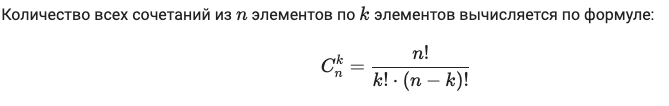

In [99]:
from itertools import combinations

numbers = [1, 2, 3, 4]

print(list(combinations(numbers, r=1)))
print(list(combinations(numbers, r=2)))
print(list(combinations(numbers, r=3)))
print(list(combinations(numbers, r=4)))

[(1,), (2,), (3,), (4,)]
[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
[(1, 2, 3, 4)]


In [100]:
# элементы итерируемого объекта рассматриваются как уникальные в зависимости от их положения, а не от их значения. 
# Поэтому, если элементы уникальны, повторных значений в каждом сочетании не будет. 
# Если же не уникальны, то будут повторы.

from itertools import combinations

letters = [1, 2, 2, 2]

print(list(combinations(letters, 2)))

[(1, 2), (1, 2), (1, 2), (2, 2), (2, 2), (2, 2)]


Функция combinations_with_replacement() возвращает итератор, который содержит все сочетания из элементов переданного итерируемого объекта с повторами. Другими словами, один элемент в одном сочетании может встречаться более одного раза. Каждое сочетание заключено в кортеж нужной длины.

Аргументы функции:

- iterable — итерируемый объект
- r — целое число, длина возвращаемых кортежей

сочетания генерируются в лексикографическом порядке сортировки переданного итерируемого объекта.


In [101]:
from itertools import combinations_with_replacement

numbers = [1, 2, 3, 4]

print(list(combinations_with_replacement(numbers, 1)))
print(list(combinations_with_replacement(numbers, 2)))
print(list(combinations_with_replacement(numbers, 3)))

[(1,), (2,), (3,), (4,)]
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)]
[(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 3), (1, 3, 4), (1, 4, 4), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 3), (2, 3, 4), (2, 4, 4), (3, 3, 3), (3, 3, 4), (3, 4, 4), (4, 4, 4)]


In [103]:
# пример на подсчет числа сочетаний (размещений ): 
# сколькими способами можно назначить двух дежурных из 26 человек?

# формула n! / (k!(n - k)!)

26*25/2 

325.0

### Повторим еще раз: 

💡 Комбинация — это вариация набора объектов из некоторого количества наборов.

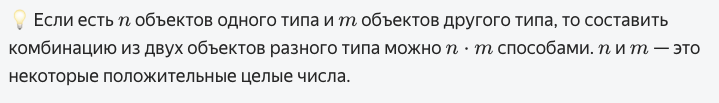

 Число перестановок — это количество всевозможных перестановок набора из некоторых элементов.

 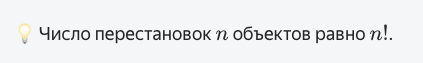

💡 Размещения — это комбинации объектов исходного набора с заданным количеством элементов, которые различаются самими элементами и их расположением.

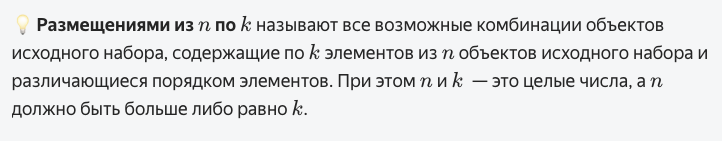

💡 Сочетания — это комбинации объектов исходного набора с заданным количеством элементов, которые различаются только самими элементами. У сочетаний нет порядка элементов — это неупорядоченные комбинации.

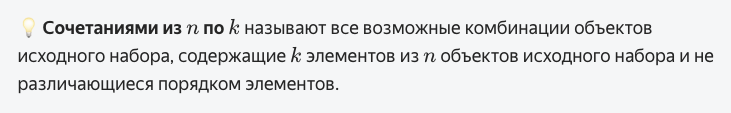

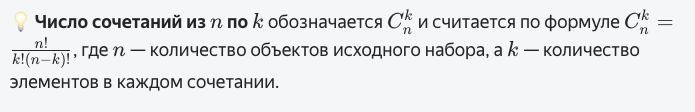

### Задачи на комбинаторику

        Напишите программу, которая выводит все перестановки символов строки без дубликатов.

        Формат входных данных
        На вход программе подается произвольная строка из строчных латинских букв, длина которой не превышает 
        10
        10 символов.

        Формат выходных данных
        Программа должна вывести все перестановки символов данной строки без дубликатов в алфавитном порядке, каждую на отдельной строке.

In [119]:
from itertools import permutations
def permut_this(string: str):
    return print(*sorted(set(map(lambda x: ''.join(x), permutations(string)))), sep='\n')

permut_this('aab')
print()

permut_this('stepik')

aab
aba
baa

eikpst
eikpts
eikspt
eikstp
eiktps
eiktsp
eipkst
eipkts
eipskt
eipstk
eiptks
eiptsk
eiskpt
eisktp
eispkt
eisptk
eistkp
eistpk
eitkps
eitksp
eitpks
eitpsk
eitskp
eitspk
ekipst
ekipts
ekispt
ekistp
ekitps
ekitsp
ekpist
ekpits
ekpsit
ekpsti
ekptis
ekptsi
eksipt
eksitp
ekspit
ekspti
ekstip
ekstpi
ektips
ektisp
ektpis
ektpsi
ektsip
ektspi
epikst
epikts
episkt
epistk
epitks
epitsk
epkist
epkits
epksit
epksti
epktis
epktsi
epsikt
epsitk
epskit
epskti
epstik
epstki
eptiks
eptisk
eptkis
eptksi
eptsik
eptski
esikpt
esiktp
esipkt
esiptk
esitkp
esitpk
eskipt
eskitp
eskpit
eskpti
esktip
esktpi
espikt
espitk
espkit
espkti
esptik
esptki
estikp
estipk
estkip
estkpi
estpik
estpki
etikps
etiksp
etipks
etipsk
etiskp
etispk
etkips
etkisp
etkpis
etkpsi
etksip
etkspi
etpiks
etpisk
etpkis
etpksi
etpsik
etpski
etsikp
etsipk
etskip
etskpi
etspik
etspki
iekpst
iekpts
iekspt
iekstp
iektps
iektsp
iepkst
iepkts
iepskt
iepstk
ieptks
ieptsk
ieskpt
iesktp
iespkt
iesptk
iestkp
iestpk
ietkps
ietksp
ietpks


        Тимур пришел в книжный магазин, чтобы приобрести новую книгу по математике, стоимость которой равна 
        100$. У него в кошельке имеется множество купюр различного номинала, которые представлены в списке wallet. Например, Тимур может расплатиться одной купюрой в 
        100$ или двумя по 
        50$.

        Дополните приведенный ниже код, чтобы он вывел количество способов, которыми Тимур может приобрести книгу стоимостью 
        100$.

        Примечание. Способы расплатиться наборами купюр вида 

        50,20,20,10 и 
        20,10,50,20 считаются одинаковыми и не должны учитываться повторно.

In [129]:
wallet = [100, 100, 50, 50, 50, 50, 20, 20, 20, 10, 10, 10, 10, 10, 5, 5, 1, 1, 1, 1, 1]
from itertools import combinations

counter = 0
for i in range(1,len(wallet)):
    baknotes_options = list(map(lambda tup: sum(tup), set(combinations(wallet, i))))
    counter += baknotes_options.count(100)

print(counter)

16


        Тимур пришел в книжный магазин, чтобы приобрести новую книгу по математике, стоимость которой равна 
        100$. У него в кошельке имеется неограниченное количество купюр, номиналы которых представлены в списке wallet. Другими словами, Тимур может использовать купюру одного номинала произвольное количество раз. Например, он может расплатиться пятью купюрами по 
        20$ или десятью по 10$.

        Дополните приведенный ниже код, чтобы он вывел количество способов, которыми Тимур может приобрести книгу стоимостью 100$.

        Примечание.аналогично прошлой задаче

In [142]:
wallet = [100, 50, 20, 10, 5]
from itertools import combinations_with_replacement

counter = 1
wallet.remove(100)

for i in range(2, 21):
    baknotes_options = list(map(lambda tup: sum(tup), set(combinations_with_replacement(wallet,i))))
    counter += baknotes_options.count(100)

print(counter)
    

50


In [139]:
wallet = [50, 20, 10, 5]
print(*combinations_with_replacement(wallet,21), sep='\n')

(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 20)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 10)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 20, 20)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 20, 10)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 20, 5)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 10, 10)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 10, 5)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5, 5)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 20, 20, 20)
(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

        Задача о рюкзаке
        Вам доступен список items, содержащий набор предметов. Каждый предмет представлен в виде именованного кортежа и имеет три параметра — название, массу (в граммах) и ценность (в рублях). Также имеется рюкзак определённой грузоподъёмности.

        Напишите программу, которая определяет, какие предметы из представленного набора следует взять, чтобы собрать рюкзак с максимальной ценностью предметов внутри, соблюдая при этом весовое ограничение рюкзака.

        Формат входных данных
        На вход программе в первой строке подается число — грузоподъемность рюкзака (в граммах).

        Формат выходных данных
        Программа должна определить какие предметы из представленного набора следует взять, чтобы собрать рюкзак с максимальной ценностью предметов внутри, соблюдая при этом весовое ограничение рюкзака, и вывести названия полученных предметов в лексикографическом порядке, каждое на отдельной строке. Если рюкзак не позволяет взять ни один предмет, программа должна вывести текст:

        Рюкзак собрать не удастся

In [147]:
from collections import namedtuple
import itertools

Item = namedtuple('Item', ['name', 'mass', 'price'])

items = [Item('Обручальное кольцо', 7, 49_000),
         Item('Мобильный телефон', 200, 110_000),
         Item('Ноутбук', 2000, 150_000),
         Item('Ручка Паркер', 20, 37_000),
         Item('Статуэтка Оскар', 4000, 28_000),
         Item('Наушники', 150, 11_000),
         Item('Гитара', 1500, 32_000),
         Item('Золотая монета', 8, 140_000),
         Item('Фотоаппарат', 720, 79_000),
         Item('Лимитированные кроссовки', 300, 80_000)]

load_capacity = 500 #int(input()) # вместимость рюкзака в граммах 

container = []  # для вещей в рюкзак


weight_counter = 0
value_counter = 0
weights = list(map(lambda item: item.mass, items))
values =  list(map(lambda item: item.price, items))

#while weight_counter <= load_capacity:
for i in range(1,len(items)):
    weights_options = list(map(lambda tup: sum(tup),
                                   (combinations(weights, i))))
    price_options = list(map(lambda tup: sum(tup),
                                   (combinations(values, i))))
    print(weights_options)
    print(price_options)
    print()
    if i >4: break

[7, 200, 2000, 20, 4000, 150, 1500, 8, 720, 300]
[49000, 110000, 150000, 37000, 28000, 11000, 32000, 140000, 79000, 80000]

[207, 2007, 27, 4007, 157, 1507, 15, 727, 307, 2200, 220, 4200, 350, 1700, 208, 920, 500, 2020, 6000, 2150, 3500, 2008, 2720, 2300, 4020, 170, 1520, 28, 740, 320, 4150, 5500, 4008, 4720, 4300, 1650, 158, 870, 450, 1508, 2220, 1800, 728, 308, 1020]
[159000, 199000, 86000, 77000, 60000, 81000, 189000, 128000, 129000, 260000, 147000, 138000, 121000, 142000, 250000, 189000, 190000, 187000, 178000, 161000, 182000, 290000, 229000, 230000, 65000, 48000, 69000, 177000, 116000, 117000, 39000, 60000, 168000, 107000, 108000, 43000, 151000, 90000, 91000, 172000, 111000, 112000, 219000, 220000, 159000]

[2207, 227, 4207, 357, 1707, 215, 927, 507, 2027, 6007, 2157, 3507, 2015, 2727, 2307, 4027, 177, 1527, 35, 747, 327, 4157, 5507, 4015, 4727, 4307, 1657, 165, 877, 457, 1515, 2227, 1807, 735, 315, 1027, 2220, 6200, 2350, 3700, 2208, 2920, 2500, 4220, 370, 1720, 228, 940, 520, 43

In [197]:
from collections import namedtuple
from itertools import combinations

Item = namedtuple('Item', ['name', 'mass', 'price'])

items = [Item('Обручальное кольцо', 7, 49_000),
         Item('Мобильный телефон', 200, 110_000),
         Item('Ноутбук', 2000, 150_000),
         Item('Ручка Паркер', 20, 37_000),
         Item('Статуэтка Оскар', 4000, 28_000),
         Item('Наушники', 150, 11_000),
         Item('Гитара', 1500, 32_000),
         Item('Золотая монета', 8, 140_000),
         Item('Фотоаппарат', 720, 79_000),
         Item('Лимитированные кроссовки', 300, 80_000)]

load_capacity = int(input()) # вместимость рюкзака в граммах

# условие возможности сборки рюкзака
if min(items, key= lambda item: item.mass).mass > load_capacity:
    print('Рюкзак собрать не удастся')

else:

    # функция упаковки элементов кортежей в один итератор
    def some_func(items: tuple):

        # функция суммирования содержимого кортежей, если содержимое - целые числа
        def tup_or_sum(tup: tuple) -> int | tuple:
            if all(isinstance(elem, int) for elem in tup): return sum(tup)
            else: return tup

        return tuple(map(tup_or_sum, zip(*items)))

    maximum_value = (0,0,0)     # задаем максимальную ценность в видер кортежа вида (набор, сумма веса, сумма стоимости)
    for i in range(1,len(items)+1):
        options = list(map(some_func, (combinations(items, i))))
        
        if all(map(lambda tup: tup[1]> load_capacity, options)):    # проверяем, есть ли хоть один набор с весом меньшим или
            break                                                   # равным грузоподъемности и если нет - выходим из цикла
        
        filtered_options = filter(lambda tup: tup[1] <= load_capacity,  # фильтруем кортежи, забирая только те наборы,
                                  options)                             # вес которых не больше грузоподъемности
        

        temp_max = max(filtered_options, key=lambda tup: tup[2])        # считаем промежуточный максимум и сравниваем      
        if temp_max[2] > maximum_value[2]: maximum_value = temp_max     # его с предыдущим (перезаписываем, если он меньше)
          
    print(*sorted(maximum_value[0]), sep='\n' )
    

Золотая монета
Лимитированные кроссовки
Мобильный телефон
Наушники
Обручальное кольцо
Ручка Паркер
Фотоаппарат


In [153]:
# объединить информацию о двух именнованных кортежах

Item = namedtuple('Item', ['name', 'mass', 'price'])


three_items = (Item('Обручальное кольцо', 7, 49_000),
         Item('Мобильный телефон', 200, 110_000), 
         Item('Ноутбук', 2000, 150_000))

# функция упаковки элементов кортежей в один итератор
def some_func(items: tuple):

    # функция суммирования содержимого кортежей, если содержимое - целые числа
    def tup_or_sum(tup):
        if all(isinstance(elem, int) for elem in tup): return sum(tup)
        else: return tup

    return map(tup_or_sum, zip(*items))

list(some_func(three_items))


[('Обручальное кольцо', 'Мобильный телефон', 'Ноутбук'), 2207, 309000]

In [200]:
# хорошее решение из комментариев 
# 1) берем комбинаторику всех сочетаний и распаковываем все полученные кортежи - chain.from_iterablу 
# 2) фильтруем кортежи вида (элемент1, элемент 2... элемент), находящиеся в итераторе по прицнипу: 
# - если сумма масс элементов меньше грузоподъемности, то оставляем в итераторе 
# - если нет - выкидываем 
# 3) результат - из отфильтрованного итератора извлекаем максимальный элемент, но с ключом по сумме цены кортежей 
# 4) на печать выводим сортированные имена кортежей

from collections import namedtuple
from itertools import*

Item = namedtuple('Item', ['name', 'mass', 'price'])
items = [Item('Обручальное кольцо', 7, 49_000), Item('Мобильный телефон', 200, 110_000),
         Item('Ноутбук', 2000, 150_000), Item('Ручка Паркер', 20, 37_000),
         Item('Статуэтка Оскар', 4000, 28_000), Item('Наушники', 150, 11_000),
         Item('Гитара', 1500, 32_000), Item('Золотая монета', 8, 140_000),
         Item('Фотоаппарат', 720, 79_000), Item('Лимитированные кроссовки', 300, 80_000)]

value = int(input())

if min(items, key=lambda x: x.mass).mass > value:
    print('Рюкзак собрать не удастся')
else:
    data = chain.from_iterable(combinations(items, r=i) for i in range(1, 11))
    data_filtered = filter(lambda x: value >= sum(i.mass for i in x), data)
    result = max(data_filtered, key=lambda x: sum(i.price for i in x))
    print(*sorted(i.name for i in result), sep='\n')

Золотая монета
Лимитированные кроссовки
Мобильный телефон
Наушники
Обручальное кольцо
Ручка Паркер
Фотоаппарат


### Декартово произведение множеств
https://stepik.org/lesson/680669/step/15?unit=679339

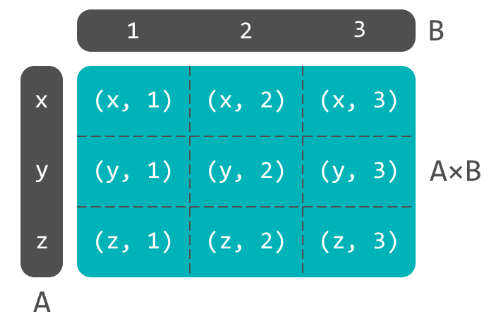

Функция product()
Функция product() возвращает итератор, который содержит декартово произведение всех переданных итерируемых объектов.

Аргументы функции:

- *iterables — итерируемые объекты
- repeat — целое число, количество повторов; по умолчанию имеет значение 1

In [201]:
from itertools import product

numbers = [1, 2]
letters = ['x', 'y', 'z']
flags = [False, True]

print(list(product(numbers, letters)))
print(list(product(letters, numbers)))
print(list(product(letters, numbers, flags)))

[(1, 'x'), (1, 'y'), (1, 'z'), (2, 'x'), (2, 'y'), (2, 'z')]
[('x', 1), ('x', 2), ('y', 1), ('y', 2), ('z', 1), ('z', 2)]
[('x', 1, False), ('x', 1, True), ('x', 2, False), ('x', 2, True), ('y', 1, False), ('y', 1, True), ('y', 2, False), ('y', 2, True), ('z', 1, False), ('z', 1, True), ('z', 2, False), ('z', 2, True)]


In [202]:
# Чтобы вычислить декартово произведение итерируемого объекта с самим собой, 
# можно использовать необязательный аргумент repeat.


from itertools import product

letters = 'abc'

print(list(product(letters, repeat=2))) # равнозначно product(letters, letters)

[('a', 'a'), ('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'b'), ('b', 'c'), ('c', 'a'), ('c', 'b'), ('c', 'c')]


Функцию product() удобно использовать для замены вложенных циклов

        Однако нужно помнить, что функция product() использует дополнительную память, поэтому на больших итерируемых объектах может работать медленнее вложенных циклов.

In [204]:
for hours in range(24):
    for minutes in range(60):
        for seconds in range(60):
            print(hours, ':', minutes, ':', seconds)

0 : 0 : 0
0 : 0 : 1
0 : 0 : 2
0 : 0 : 3
0 : 0 : 4
0 : 0 : 5
0 : 0 : 6
0 : 0 : 7
0 : 0 : 8
0 : 0 : 9
0 : 0 : 10
0 : 0 : 11
0 : 0 : 12
0 : 0 : 13
0 : 0 : 14
0 : 0 : 15
0 : 0 : 16
0 : 0 : 17
0 : 0 : 18
0 : 0 : 19
0 : 0 : 20
0 : 0 : 21
0 : 0 : 22
0 : 0 : 23
0 : 0 : 24
0 : 0 : 25
0 : 0 : 26
0 : 0 : 27
0 : 0 : 28
0 : 0 : 29
0 : 0 : 30
0 : 0 : 31
0 : 0 : 32
0 : 0 : 33
0 : 0 : 34
0 : 0 : 35
0 : 0 : 36
0 : 0 : 37
0 : 0 : 38
0 : 0 : 39
0 : 0 : 40
0 : 0 : 41
0 : 0 : 42
0 : 0 : 43
0 : 0 : 44
0 : 0 : 45
0 : 0 : 46
0 : 0 : 47
0 : 0 : 48
0 : 0 : 49
0 : 0 : 50
0 : 0 : 51
0 : 0 : 52
0 : 0 : 53
0 : 0 : 54
0 : 0 : 55
0 : 0 : 56
0 : 0 : 57
0 : 0 : 58
0 : 0 : 59
0 : 1 : 0
0 : 1 : 1
0 : 1 : 2
0 : 1 : 3
0 : 1 : 4
0 : 1 : 5
0 : 1 : 6
0 : 1 : 7
0 : 1 : 8
0 : 1 : 9
0 : 1 : 10
0 : 1 : 11
0 : 1 : 12
0 : 1 : 13
0 : 1 : 14
0 : 1 : 15
0 : 1 : 16
0 : 1 : 17
0 : 1 : 18
0 : 1 : 19
0 : 1 : 20
0 : 1 : 21
0 : 1 : 22
0 : 1 : 23
0 : 1 : 24
0 : 1 : 25
0 : 1 : 26
0 : 1 : 27
0 : 1 : 28
0 : 1 : 29
0 : 1 : 30
0 : 1 : 31
0 : 1 : 

In [205]:
from itertools import product

for time in product(range(24), range(60), range(60)):
    print(*time, sep=' : ')

0 : 0 : 0
0 : 0 : 1
0 : 0 : 2
0 : 0 : 3
0 : 0 : 4
0 : 0 : 5
0 : 0 : 6
0 : 0 : 7
0 : 0 : 8
0 : 0 : 9
0 : 0 : 10
0 : 0 : 11
0 : 0 : 12
0 : 0 : 13
0 : 0 : 14
0 : 0 : 15
0 : 0 : 16
0 : 0 : 17
0 : 0 : 18
0 : 0 : 19
0 : 0 : 20
0 : 0 : 21
0 : 0 : 22
0 : 0 : 23
0 : 0 : 24
0 : 0 : 25
0 : 0 : 26
0 : 0 : 27
0 : 0 : 28
0 : 0 : 29
0 : 0 : 30
0 : 0 : 31
0 : 0 : 32
0 : 0 : 33
0 : 0 : 34
0 : 0 : 35
0 : 0 : 36
0 : 0 : 37
0 : 0 : 38
0 : 0 : 39
0 : 0 : 40
0 : 0 : 41
0 : 0 : 42
0 : 0 : 43
0 : 0 : 44
0 : 0 : 45
0 : 0 : 46
0 : 0 : 47
0 : 0 : 48
0 : 0 : 49
0 : 0 : 50
0 : 0 : 51
0 : 0 : 52
0 : 0 : 53
0 : 0 : 54
0 : 0 : 55
0 : 0 : 56
0 : 0 : 57
0 : 0 : 58
0 : 0 : 59
0 : 1 : 0
0 : 1 : 1
0 : 1 : 2
0 : 1 : 3
0 : 1 : 4
0 : 1 : 5
0 : 1 : 6
0 : 1 : 7
0 : 1 : 8
0 : 1 : 9
0 : 1 : 10
0 : 1 : 11
0 : 1 : 12
0 : 1 : 13
0 : 1 : 14
0 : 1 : 15
0 : 1 : 16
0 : 1 : 17
0 : 1 : 18
0 : 1 : 19
0 : 1 : 20
0 : 1 : 21
0 : 1 : 22
0 : 1 : 23
0 : 1 : 24
0 : 1 : 25
0 : 1 : 26
0 : 1 : 27
0 : 1 : 28
0 : 1 : 29
0 : 1 : 30
0 : 1 : 31
0 : 1 : 

In [207]:
# генерация карточных комбинаций

from itertools import product

ranks = (2, 3, 4, 5, 6, 7, 8, 9, 10, 'валет', 'дама', 'король', 'туз')
suits = ('треф', 'бубен', 'червей', 'пики')

cards = (product(ranks, suits))

print(*cards, sep='\n')

(2, 'треф')
(2, 'бубен')
(2, 'червей')
(2, 'пики')
(3, 'треф')
(3, 'бубен')
(3, 'червей')
(3, 'пики')
(4, 'треф')
(4, 'бубен')
(4, 'червей')
(4, 'пики')
(5, 'треф')
(5, 'бубен')
(5, 'червей')
(5, 'пики')
(6, 'треф')
(6, 'бубен')
(6, 'червей')
(6, 'пики')
(7, 'треф')
(7, 'бубен')
(7, 'червей')
(7, 'пики')
(8, 'треф')
(8, 'бубен')
(8, 'червей')
(8, 'пики')
(9, 'треф')
(9, 'бубен')
(9, 'червей')
(9, 'пики')
(10, 'треф')
(10, 'бубен')
(10, 'червей')
(10, 'пики')
('валет', 'треф')
('валет', 'бубен')
('валет', 'червей')
('валет', 'пики')
('дама', 'треф')
('дама', 'бубен')
('дама', 'червей')
('дама', 'пики')
('король', 'треф')
('король', 'бубен')
('король', 'червей')
('король', 'пики')
('туз', 'треф')
('туз', 'бубен')
('туз', 'червей')
('туз', 'пики')


In [210]:
# генерация карточных комбинаций

from itertools import product

ranks = (2, 3, 4, 5, 6, 7, 8, 9, 10, 'валет', 'дама', 'король', 'туз')
suits = ('пики', 'треф', 'бубен', 'червей')

cards = product(ranks, suits)

# запускаем сложную сортировку (сравнивать по индексу в кортеже рубашек: пики-0, трефы-1, бубны-2, черви-3)
print(*sorted(cards, key= lambda card: suits.index(card[1]) ), sep='\n')

(2, 'пики')
(3, 'пики')
(4, 'пики')
(5, 'пики')
(6, 'пики')
(7, 'пики')
(8, 'пики')
(9, 'пики')
(10, 'пики')
('валет', 'пики')
('дама', 'пики')
('король', 'пики')
('туз', 'пики')
(2, 'треф')
(3, 'треф')
(4, 'треф')
(5, 'треф')
(6, 'треф')
(7, 'треф')
(8, 'треф')
(9, 'треф')
(10, 'треф')
('валет', 'треф')
('дама', 'треф')
('король', 'треф')
('туз', 'треф')
(2, 'бубен')
(3, 'бубен')
(4, 'бубен')
(5, 'бубен')
(6, 'бубен')
(7, 'бубен')
(8, 'бубен')
(9, 'бубен')
(10, 'бубен')
('валет', 'бубен')
('дама', 'бубен')
('король', 'бубен')
('туз', 'бубен')
(2, 'червей')
(3, 'червей')
(4, 'червей')
(5, 'червей')
(6, 'червей')
(7, 'червей')
(8, 'червей')
(9, 'червей')
(10, 'червей')
('валет', 'червей')
('дама', 'червей')
('король', 'червей')
('туз', 'червей')


Шахматная доска

In [211]:
from string import ascii_lowercase
from itertools import product

letters = ascii_lowercase[:8]
digits = [1, 2, 3, 4, 5, 6, 7, 8]

for letter in letters:
    for digit in digits:
        print(letter, digit, sep='', end=' ')

a1 a2 a3 a4 a5 a6 a7 a8 b1 b2 b3 b4 b5 b6 b7 b8 c1 c2 c3 c4 c5 c6 c7 c8 d1 d2 d3 d4 d5 d6 d7 d8 e1 e2 e3 e4 e5 e6 e7 e8 f1 f2 f3 f4 f5 f6 f7 f8 g1 g2 g3 g4 g5 g6 g7 g8 h1 h2 h3 h4 h5 h6 h7 h8 

In [220]:
from string import ascii_lowercase
from itertools import product, chain

letters = ascii_lowercase[:8]
digits = [1, 2, 3, 4, 5, 6, 7, 8]

print(*(f'{a}{b}' for a, b in  chain(product(letters, digits))))

#print(*map(lambda tup: ''.join(map(int,tup)), product(letters, digits)))

a1 a2 a3 a4 a5 a6 a7 a8 b1 b2 b3 b4 b5 b6 b7 b8 c1 c2 c3 c4 c5 c6 c7 c8 d1 d2 d3 d4 d5 d6 d7 d8 e1 e2 e3 e4 e5 e6 e7 e8 f1 f2 f3 f4 f5 f6 f7 f8 g1 g2 g3 g4 g5 g6 g7 g8 h1 h2 h3 h4 h5 h6 h7 h8


        Напишите password_gen(), которая возвращает генератор, порождающий все трехсимвольные строковые пароли в порядке возрастания, составленные из цифр от 0 до 9


In [222]:

password_gen = lambda : (f'{one}{two}{three}' for one, two, three in product(range(9), repeat=3))

passwords = password_gen()

print(next(passwords))
print(next(passwords))
print(next(passwords))

000
001
002


        Системы счисления
        Напишите программу, которая генерирует в системе счисления n все числа длины m.

        Формат входных данных
        На вход программе в первой строке подается натуральное число n≤16 — основание системы счисления, а затем натуральное число m — длина генерируемых чисел.

        Формат выходных данных
        Программа должна сгенерировать в системе счисления n все числа длины m и вывести их в порядке возрастания через пробел.

        Примечание 1. В системах счислениях по основанию 11 и выше в качестве цифр должны использоваться заглавные латинские буквы

In [273]:
n, m = (int(input()) for _ in range(2))

if n <=10: 
    result = product((str(i) for i in range(n)), repeat=m)
elif 10< n < 36:
    seq_system = [str(i) for i in (range(10))] + \
                      [chr(i) for i in range(ord('A'), ord('A')+ n-10)]
    result = product(seq_system, repeat=m )

print(*map(lambda tup: ''.join(tup) 
           ,result))



00 01 02 03 04 05 06 07 08 09 0A 0B 0C 0D 0E 0F 10 11 12 13 14 15 16 17 18 19 1A 1B 1C 1D 1E 1F 20 21 22 23 24 25 26 27 28 29 2A 2B 2C 2D 2E 2F 30 31 32 33 34 35 36 37 38 39 3A 3B 3C 3D 3E 3F 40 41 42 43 44 45 46 47 48 49 4A 4B 4C 4D 4E 4F 50 51 52 53 54 55 56 57 58 59 5A 5B 5C 5D 5E 5F 60 61 62 63 64 65 66 67 68 69 6A 6B 6C 6D 6E 6F 70 71 72 73 74 75 76 77 78 79 7A 7B 7C 7D 7E 7F 80 81 82 83 84 85 86 87 88 89 8A 8B 8C 8D 8E 8F 90 91 92 93 94 95 96 97 98 99 9A 9B 9C 9D 9E 9F A0 A1 A2 A3 A4 A5 A6 A7 A8 A9 AA AB AC AD AE AF B0 B1 B2 B3 B4 B5 B6 B7 B8 B9 BA BB BC BD BE BF C0 C1 C2 C3 C4 C5 C6 C7 C8 C9 CA CB CC CD CE CF D0 D1 D2 D3 D4 D5 D6 D7 D8 D9 DA DB DC DD DE DF E0 E1 E2 E3 E4 E5 E6 E7 E8 E9 EA EB EC ED EE EF F0 F1 F2 F3 F4 F5 F6 F7 F8 F9 FA FB FC FD FE FF


In [227]:
int(hex(125)[2:].upper(), 16)

125

In [261]:
print([str(i) for i in (range(10))] + \
                      [chr(i) for i in range(ord('A'), ord('Z')+ 1)])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [263]:
lst = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
len(list(product(lst, repeat=3)))

46656

In [265]:
46656**(1/2)

216.0

In [243]:
int('001', 10)

1

In [258]:
int('0AA', 16)

170

In [244]:
hex(12312412341)

'0x2dde080b5'

In [246]:
num = 12312412341
while num >16:
    number = num%16
    print(number)
    num //= 16 
print(num)

5
11
0
8
0
14
13
13
2
